In [1]:
import pandas as pd

In [15]:
import seaborn as sns
import matplotlib as plt

In [38]:
from sklearn.feature_extraction import DictVectorizer

In [25]:
df = pd.read_parquet('./data/green_tripdata_2021-01.parquet')

In [26]:
df['duration'] = pd.to_datetime(df.lpep_dropoff_datetime) - pd.to_datetime(df.lpep_pickup_datetime)
df.duration = df.duration.apply(lambda td: td.total_seconds()/60)

In [27]:
#filter on type of trip - see documentation for types
df = df[df.trip_type == 2]

/home/azureuser/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

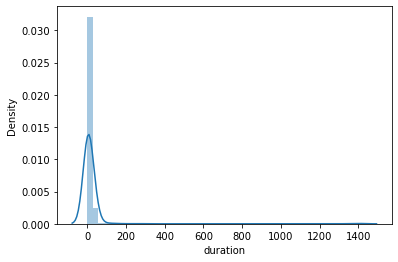

In [28]:
sns.distplot(df.duration)

In [29]:
df.duration.describe(percentiles=[0.95, 0.98, 0.99]) # 98% of trips are less than an hour long in terms of duration so it makes more sense to focus our predictions in short trips

count    1238.000000
mean       18.305493
std       108.364382
min         0.000000
50%         1.666667
95%        35.604167
98%        59.339333
99%       149.837833
max      1416.100000
Name: duration, dtype: float64

In [30]:
((df.duration >= 1) & (df.duration <= 60)).mean() #again only 50% of 'short trips' are over  a 1 min duration which is weird
df[(df.duration >= 1) & (df.duration <= 60)] 

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
30,2,2021-01-01 00:35:29,2021-01-01 00:55:15,N,5.0,74,247,1.0,3.64,13.0,...,0.0,0.0,0.0,None,0.3,13.3,2.0,2.0,0.0,19.766667
53,2,2021-01-01 01:54:51,2021-01-01 02:15:35,N,5.0,74,94,1.0,5.82,18.0,...,0.0,0.0,0.0,None,0.3,18.3,2.0,2.0,0.0,20.733333
69,2,2021-01-01 02:42:49,2021-01-01 02:50:59,N,5.0,136,241,1.0,0.57,9.0,...,0.0,0.0,0.0,None,0.3,9.3,2.0,2.0,0.0,8.166667
88,2,2021-01-01 04:52:02,2021-01-01 05:05:01,N,5.0,247,75,1.0,3.43,15.0,...,0.0,0.0,0.0,None,0.3,15.3,2.0,2.0,0.0,12.983333
96,2,2021-01-01 05:52:43,2021-01-01 05:58:02,N,5.0,7,7,1.0,0.65,50.0,...,0.0,7.0,0.0,None,0.3,57.3,1.0,2.0,0.0,5.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40324,2,2021-01-31 18:42:52,2021-01-31 19:08:44,N,5.0,69,213,2.0,5.40,16.0,...,0.0,0.0,0.0,None,0.3,16.3,2.0,2.0,0.0,25.866667
40352,1,2021-01-31 19:32:22,2021-01-31 19:50:16,N,5.0,82,129,2.0,2.40,0.0,...,0.0,0.0,0.0,None,0.0,0.0,2.0,2.0,0.0,17.900000
40363,2,2021-01-31 19:26:20,2021-01-31 19:35:47,N,5.0,167,248,2.0,1.31,10.0,...,0.0,0.0,0.0,None,0.3,10.3,2.0,2.0,0.0,9.450000
40364,2,2021-01-31 19:44:54,2021-01-31 20:19:56,N,5.0,147,147,2.0,6.97,30.0,...,0.0,0.0,0.0,None,0.3,30.3,2.0,2.0,0.0,35.033333


In [31]:
df = df[(df.duration >= 1) & (df.duration <= 60)]

In [32]:
categorical = ['PULocationID','DOLocationID']
numerical = ['trip_distance']

In [36]:
#convert form int to object to apply one-hot encoding
df[categorical] = df[categorical].astype(str)

In [39]:
dv = DictVectorizer() #convert dict to vector so we need first to convert our df to a collection of dictionaries

In [40]:
# exaple on 10 rows of the df
df[categorical+numerical].iloc[:10].to_dict(orient='records')

[{'PULocationID': '74', 'DOLocationID': '247', 'trip_distance': 3.64},
 {'PULocationID': '74', 'DOLocationID': '94', 'trip_distance': 5.82},
 {'PULocationID': '136', 'DOLocationID': '241', 'trip_distance': 0.57},
 {'PULocationID': '247', 'DOLocationID': '75', 'trip_distance': 3.43},
 {'PULocationID': '7', 'DOLocationID': '7', 'trip_distance': 0.65},
 {'PULocationID': '152', 'DOLocationID': '152', 'trip_distance': 0.1},
 {'PULocationID': '159', 'DOLocationID': '159', 'trip_distance': 0.27},
 {'PULocationID': '116', 'DOLocationID': '247', 'trip_distance': 1.21},
 {'PULocationID': '195', 'DOLocationID': '106', 'trip_distance': 0.49},
 {'PULocationID': '74', 'DOLocationID': '236', 'trip_distance': 2.12}]

In [41]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

In [42]:
X_train = dv.fit_transform(train_dicts)

In [43]:
X_train

<640x236 sparse matrix of type '<class 'numpy.float64'>'
	with 1920 stored elements in Compressed Sparse Row format>

In [44]:
dv.feature_names_

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=112',
 'DOLocationID=116',
 'DOLocationID=118',
 'DOLocationID=119',
 'DOLocationID=121',
 'DOLocationID=126',
 'DOLocationID=127',
 'DOLocationID=128',
 'DOLocationID=129',
 'DOLocationID=130',
 'DOLocationID=131',
 'DOLocationID=132',
 'DOLocationID=134',
 'DOLocationID=135',
 'DOLocationID=136',
 'DOLocationID=138',
 'DOLocationID=140',
 'DOLocationID=141',
 'DOLocationID=143',
 'DOLocationID=145',
 'DOLocationID=146',
 'DOLocationID=147',
 'DOLocationID=148',
 'DOLocationID=151',
 'DOLocationID=152',
 'DOLocationID=156',
 'DOLocationID=159',
 'DOLocationID=16',
 'DOLocationID=161',
 'DOLocationID=162',
 'DOLocationID=163',
 'DOLocationID=165',
 'DOLocationID=166',
 'DOLocationID=167',
 'DOLocationID=168',
 'DOLocationID=169',
 'DOLocationID=17',
 'DOLocationID=170',
 'DOLocationID=173',
 'DOLocationID=174',
 'DOLocationID=177',
 'DOLocationID=179',
 'DOLocationID=18',
 'DOLocationID=182'